In [25]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [26]:
df = pd.read_csv('test0.csv')
df

,age,salary
0,52,45537
1,60,67324
2,52,9657
3,19,61026
4,37,13808
...,...,...
95,41,38384
96,48,70075
97,53,13415
98,61,49453


(10.0, 70.0, 0.0, 120000.0)

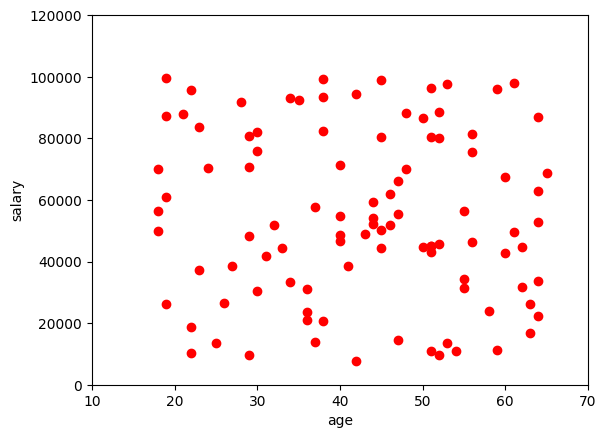

In [27]:
%matplotlib inline
plt.xlabel('age')
plt.ylabel('salary')
plt.scatter(df.age,df.salary,color='red')
plt.axis([10,70,-0,120000])


### Using sklearn

In [28]:
reg = linear_model.LinearRegression()
x_ = df.drop('salary',axis='columns')
y_ = df.salary

reg.fit(x_,y_)

print('intercept:' ,reg.intercept_)

print('coefficient:' ,reg.coef_)

print('prediction: ')
reg.predict([[25]])

intercept: 60781.617808837815
coefficient: [-149.55639073]
prediction: 


c:\Users\dong5\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([57042.70804069])

### Using formula by code

![title](./image_note/mse_f.png)

![title](./image_note/note1.png)

In [29]:
ndata = np.genfromtxt("test0.csv", delimiter=",")
x1 = df["age"]
y1 = df["salary"]

x_num = df.shape[0]

X2 = np.c_[np.ones((x_num,1)),x1]
mse = np.linalg.inv(X2.T.dot(X2)).dot(X2.T).dot(y1)

print('intercept:' , mse[0])

print('coefficient:' , mse[1])

pred = mse[1] * 25 + mse[0]
print('if age is 25, prediction: ', pred)

intercept: 60781.61780883781
coefficient: -149.55639072606934
if age is 25, prediction:  57042.70804068608


(10.0, 70.0, 0.0, 120000.0)

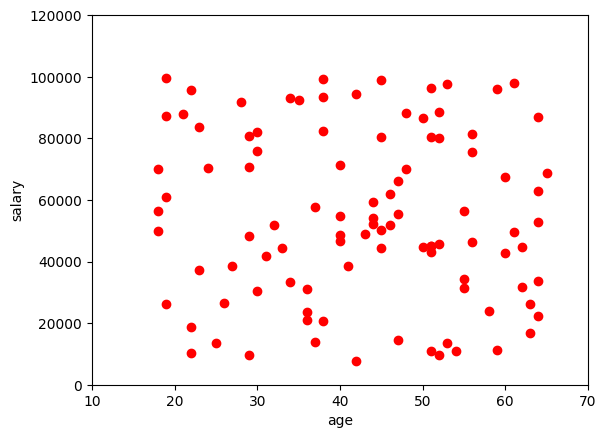

In [30]:
plt.xlabel('age')
plt.ylabel('salary')
plt.scatter(df.age,df.salary,color='red')
plt.axis([10,70,-0,120000])

In [31]:
from sklearn.preprocessing import PolynomialFeatures
np.set_printoptions(suppress=True)
ndata1 = np.genfromtxt("test0_1.csv", delimiter=",").transpose()
x3 = ndata1[0].reshape(-1,1)
y3 = ndata1[1]
poly = PolynomialFeatures(degree = 2,include_bias = False)
x3_poly = poly.fit_transform(x3)



In [32]:
lin_reg = LinearRegression()
lin_reg.fit(x3_poly,y3)

LinearRegression()

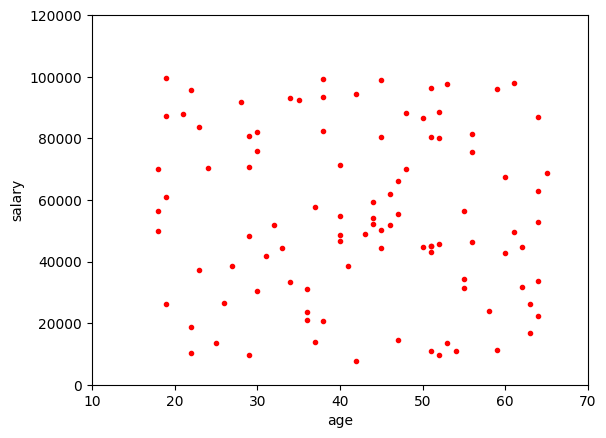

In [33]:
plt.xlabel('age')
plt.ylabel('salary')
plt.plot(x3,y3, 'r.')
y_new = lin_reg.predict(x3_poly)
plt.axis([10,70,-0,120000])

plt.show()

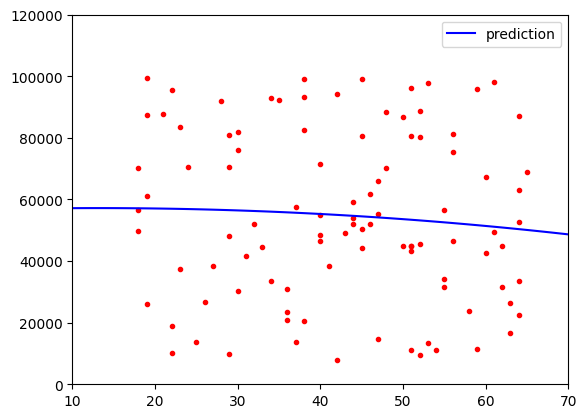

In [34]:
x_new = np.linspace(10,80,100).reshape(100,1)
x_new_poly = poly.transform(x_new)
y_new = lin_reg.predict(x_new_poly)
plt.plot(x3,y3, 'r.')
plt.plot(x_new,y_new,'b',label='prediction')
plt.axis([10,70,-0,120000])
plt.legend()
plt.show()

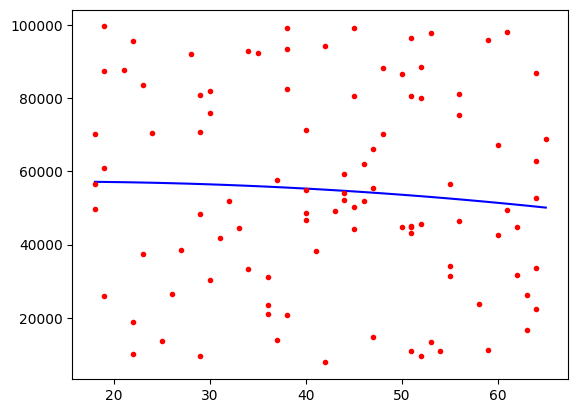

In [38]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression

def create_pipeline(degree):
    return make_pipeline(PolynomialFeatures(degree=degree),StandardScaler(),LinearRegression())

pipeline = create_pipeline(degree=2)
pipeline.fit(x3, y3)
predictions = pipeline.predict(x3)

sorted_indices = np.argsort(x3, axis=0)
sorted_x3 = np.sort(x3, axis=0)
sorted_predictions = predictions[sorted_indices]

plt.plot(sorted_x3, sorted_predictions, color='b')
plt.plot(x3, y3, 'r.')
plt.show()
